<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Diabetes_Prediction_Nishu_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'
### Batch: 18th July


### Project5: Diabetes Prediction using Logistic Regression and Random Forest Classifier Machine lEarning Algorithms
### Dataset Link: https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv

### Importing libraries

In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading dataset

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Diabetes.csv')
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.head(10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
df.shape

(768, 9)

In [18]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.describe(include='all')

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:

df.nunique()

pregnancies     17
glucose        136
diastolic       47
triceps         51
insulin        186
bmi            248
dpf            517
age             52
diabetes         2
dtype: int64

In [22]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
#replacing 0 values in df

for i in ["glucose","bmi","insulin","diastolic"]:
    df[i].replace({0:df[i].median()},inplace = True)

In [25]:

#describing dataset after replaceing 0 values in variables 
df.describe(include='all')

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
def outlier_treatment():
    l = ["bmi","glucose","triceps","age","diastolic","insulin","pregnancies","dpf"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

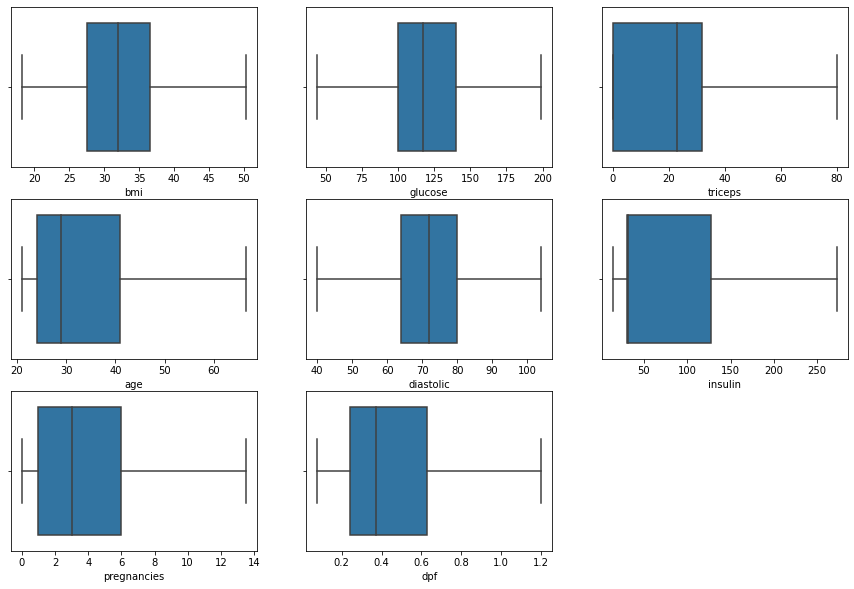

In [27]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["bmi","glucose","triceps","age","diastolic","insulin","pregnancies","dpf"]:
        if pno<9:
            plt.subplot(3,3,pno)
            sns.boxplot(df[i]);
            plt.xlabel(i)
            pno+=1

## Visualization of dataset
#### **Variables**:

pregnancies: The number of pregnancies

glucose: The plasma glucose concentration in the oral glucose tolerance test after two hours

diastolic: Diastolic

triceps: Triceps

insulin: 2-hour serum insulin (mu U/ml)

dpf: This function calculates the likelihood of having diabetes based on the lineage of a descendant

bmi: Body mass index

age: Age (year)

diabetes: Have the disease (1) or not (0)

### Pairplot of dataset

Text(0.5, 1.0, 'varibles relation with eachother and Diabetes')

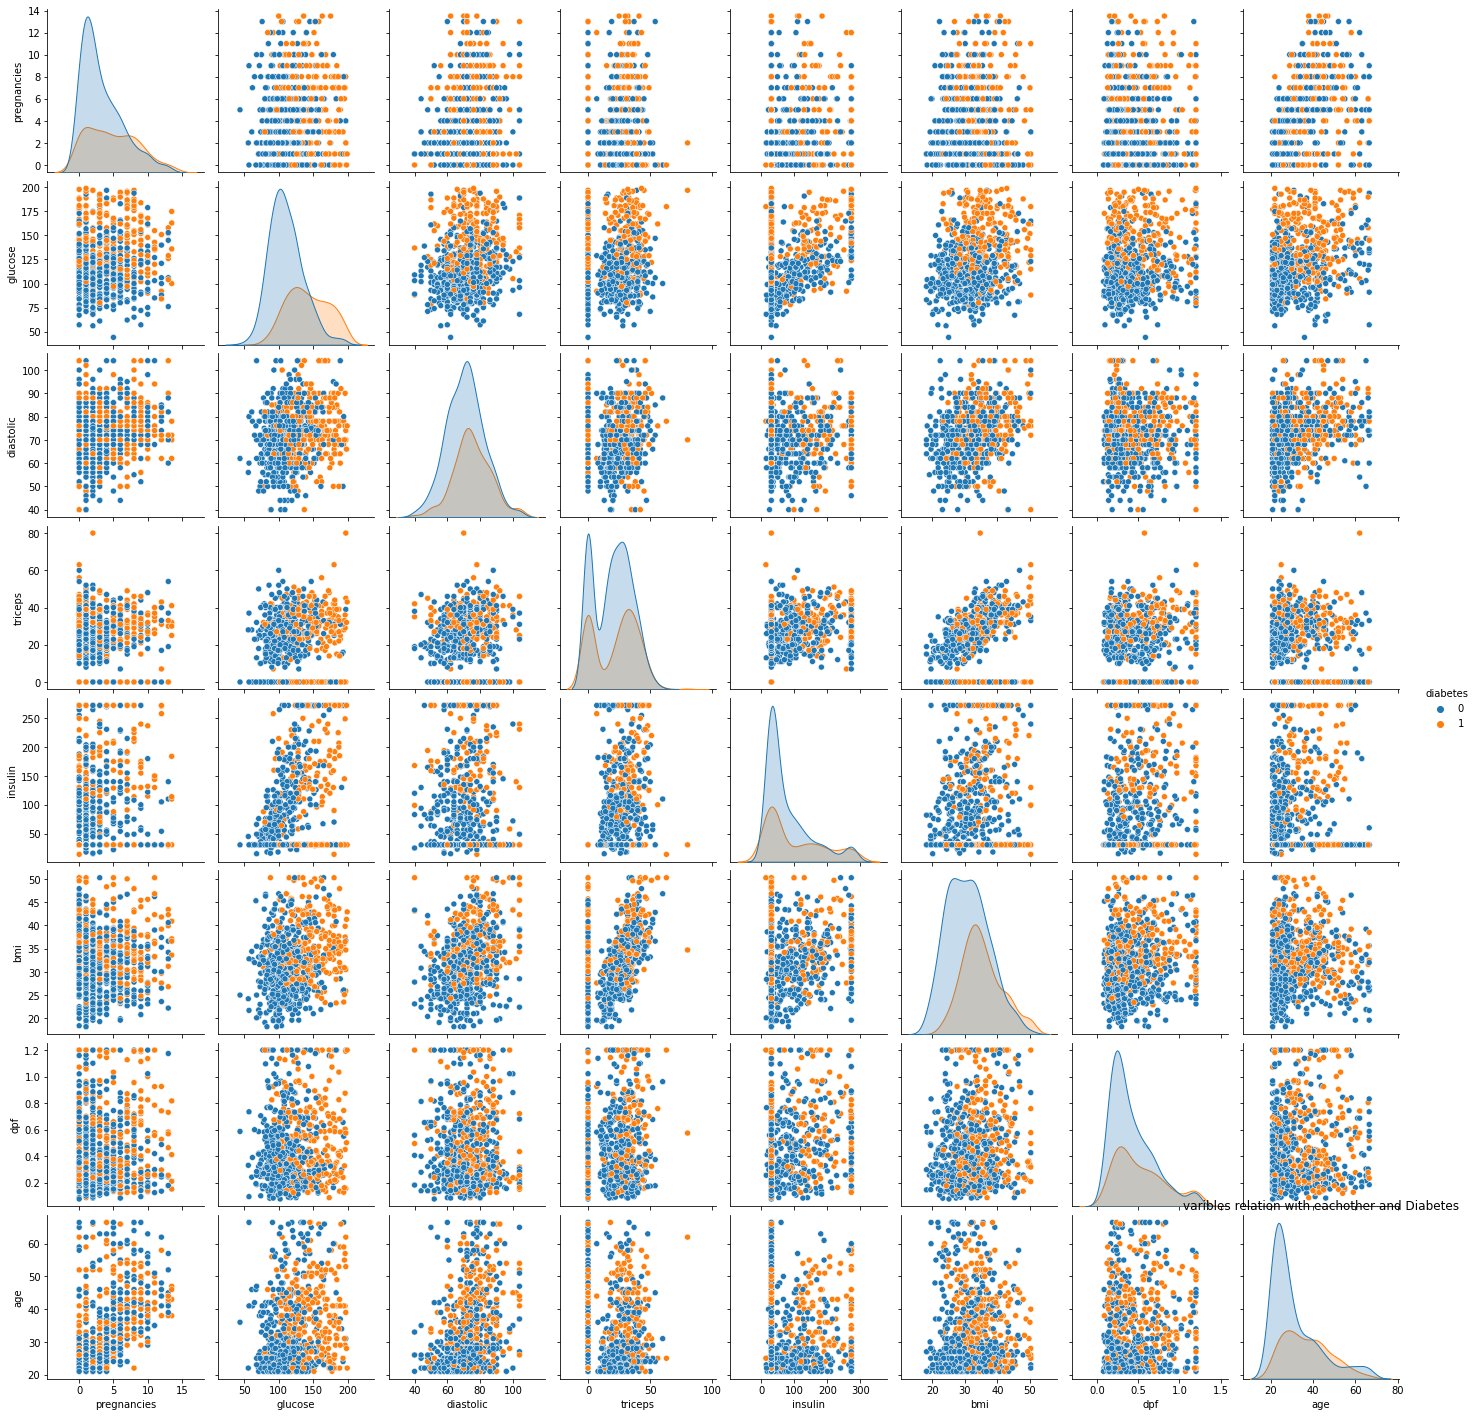

In [28]:
# variables relation with Outcome
sns.pairplot(df , hue = "diabetes" )
plt.title("varibles relation with eachother and Diabetes")

#### **result**:

1. high glucose level in pregnanci increase the risk of diabetes.

2. bmi Above 30 and high level of Glucose togather increase the risk of diabetes.

3. we can see here that increasing Glucose level is the key factor which increase the risk of diabetes.

4. High Glucose level along with other variables increase the risk of diabetes.

### value count of variable diabetes

In [29]:
df.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

#### **Countplot of variable diabetes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


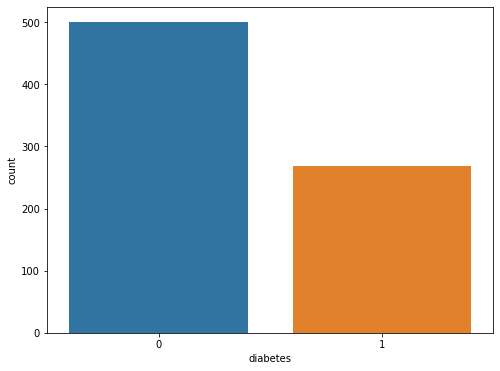

In [30]:
plt.figure(figsize=(8,6))
ax = sns.countplot("diabetes" , data = df)


### **Machine learning for prediction**
#### separating target variable

In [31]:
X = df.drop(columns = ["diabetes"])       
y = df["diabetes"]  #target variable

#### Checking correlation between variables

In [32]:
df.corr()["diabetes"].sort_values(ascending = False)

diabetes       1.000000
glucose        0.492782
bmi            0.313030
age            0.242702
pregnancies    0.220392
dpf            0.184969
diastolic      0.168971
insulin        0.147295
triceps        0.073125
Name: diabetes, dtype: float64

#### **Heatmap of correlation**

Text(0.5, 1.0, 'correlation of feature')

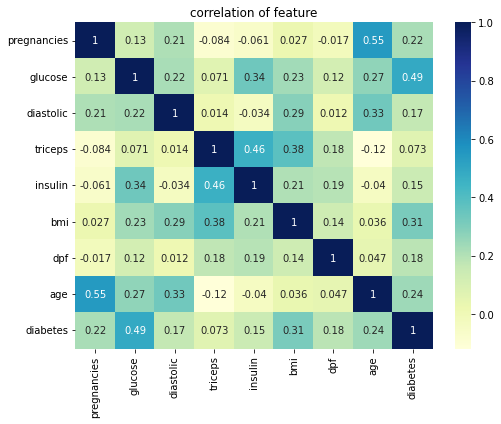

In [33]:
#using heatmap to understand correlation better in dataset df 
#Heatmap of correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )
plt.title("correlation of feature")

#### importing train_test_split to split data for training and testing

In [34]:
from sklearn.model_selection import train_test_split

#### **spliting data**

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =12689)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((537, 8), (231, 8), (537,), (231,))

## **1. Logistic Regression**
#### importing logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
#fitting data in Logisticregression
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### predicting and calculating accuracy

In [37]:
# Predict on the test set and calculate accuracy
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix
Y_pred = lg.predict(x_test)
score1=accuracy_score(y_test,Y_pred)

In [38]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       149
           1       0.68      0.67      0.67        82

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Accuracy: 77.06%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


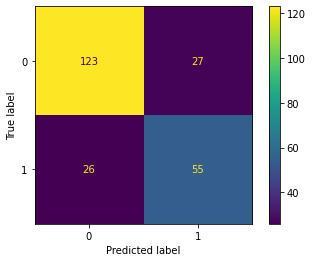

In [39]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score1*100,2)}%')

#### Roc Curve

In [40]:
from sklearn.metrics import f1_score,roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test , Y_pred)
print(fpr)
print(tpr)
print(threshold)

[0.   0.18 1.  ]
[0.         0.67901235 1.        ]
[2 1 0]


#### roc auc Score

In [41]:
roc_auc_score(y_test,Y_pred)

0.7495061728395062

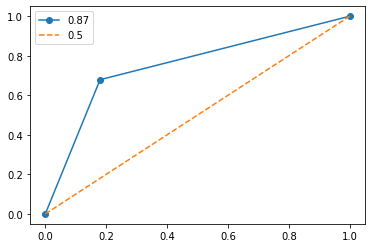

In [42]:
#roc curve with roc auc score

plt.plot(fpr,tpr, marker = "o");
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],"--")
plt.legend([0.87,0.5])

## **2. Random Forest**
#### Scaling of x_train and x_test

In [43]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

### Random Forest Accuracy Score

In [45]:
pred_y = rf.predict(x_test)
score2=accuracy_score(y_test,pred_y)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       156
           1       0.62      0.67      0.64        75

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

Accuracy: 75.76%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


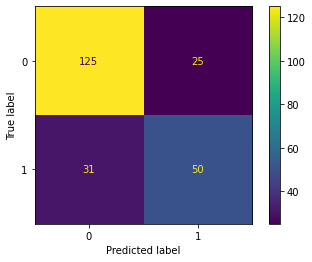

In [46]:
print('Random Forest Classifier')
report(rf)
print(f'Accuracy: {round(score2*100,2)}%')

#### ROC curve

In [47]:
fpr,tpr,threshold = roc_curve(y_test , pred_y)
print(fpr)
print(tpr)
print(threshold)

[0.         0.16666667 1.        ]
[0.         0.61728395 1.        ]
[2 1 0]


#### roc auc Score

In [48]:
roc_auc_score(y_test,pred_y)

0.7253086419753088

# **THANK YOU......))**